<a href="https://colab.research.google.com/github/vlasova-us/Python_public/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D0%BE_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Установка PySpark

актуальные версии https://downloads.apache.org/spark/

In [ ]:
!apt-get update

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,599 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,305 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-securi

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://downloads.apache.org/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz

In [ ]:
!tar -xvf spark-3.5.0-bin-hadoop3.tgz

spark-3.5.0-bin-hadoop3/
spark-3.5.0-bin-hadoop3/kubernetes/
spark-3.5.0-bin-hadoop3/kubernetes/tests/
spark-3.5.0-bin-hadoop3/kubernetes/tests/pyfiles.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/decommissioning.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/autoscale.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/python_executable_check.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/worker_memory_check.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/py_container_checks.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/decommissioning_cleanup.py
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/spark/
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/spark/decom.sh
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/spark/bindings/
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/spark/bindings/R/
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/spark/bindings/python/
spark-3.5.0-bin-hadoop3/kubern

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

## Загрузите данные при помощи spark.read.csv из приложенного файла

In [ ]:
df = spark.read.csv('/content/iris.CSV', inferSchema=True, header=True)
df.show()

+------------+-----------+------------+-----------+-------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|
+------------+-----------+------------+-----------+-------+-----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|
|         5.4|        3.9|         1.7|        0.4| Setosa|          0|
|         4.6|        3.4|         1.4|        0.3| Setosa|          0|
|         5.0|        3.4|         1.5|        0.2| Setosa|          0|
|         4.4|        2.9|         1.4|        0.2| Setosa|          0|
|         4.9|        3.1|         1.5|        0.1| Setosa|          0|
|         5.4|        3.7|         1.5|        0.2| Setosa|     

## Воспользуйтесь командами groupBy, max, min и avg, чтобы вывести максимальное минимальное и среднее значние каждого из аттрбутов цветка ('sepal_length','sepal_width','petal_length','petal_width')

In [ ]:
df_grp = df.groupBy('variety').max('sepal_length', 'sepal_width', 'petal_length', 'petal_width').show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|max(sepal_length)|max(sepal_width)|max(petal_length)|max(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              7.9|             3.8|              6.9|             2.5|
|    Setosa|              5.8|             4.4|              1.9|             0.6|
|Versicolor|              7.0|             3.4|              5.1|             1.8|
+----------+-----------------+----------------+-----------------+----------------+



In [ ]:
df_grp = df.groupBy('variety').min('sepal_length', 'sepal_width', 'petal_length', 'petal_width').show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|min(sepal_length)|min(sepal_width)|min(petal_length)|min(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              4.9|             2.2|              4.5|             1.4|
|    Setosa|              4.3|             2.3|              1.0|             0.1|
|Versicolor|              4.9|             2.0|              3.0|             1.0|
+----------+-----------------+----------------+-----------------+----------------+



In [ ]:
df_grp = df.groupBy('variety').avg('sepal_length', 'sepal_width', 'petal_length', 'petal_width').show()

+----------+-----------------+------------------+------------------+------------------+
|   variety|avg(sepal_length)|  avg(sepal_width)| avg(petal_length)|  avg(petal_width)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+



In [ ]:
import matplotlib.pyplot as plt

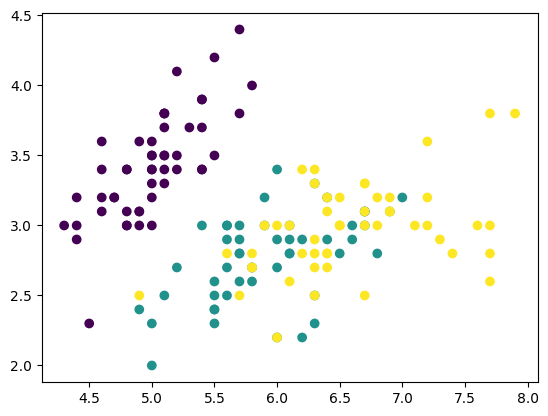

In [ ]:
plt.scatter(df[['sepal_length']].collect(), df[['sepal_width']].collect(), c=df[['variety_num']].collect())

## Выведите по аналогии график petal_length и petal_width, так же раскрашенный по типам цветков

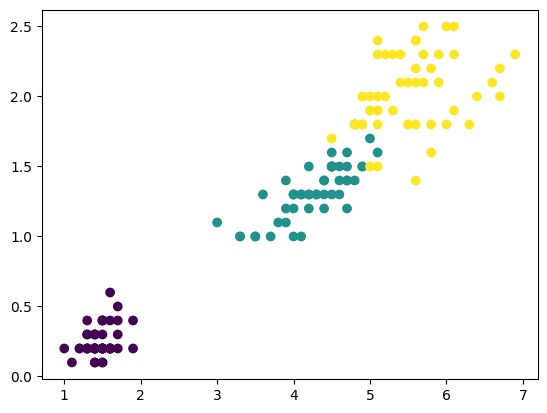

In [ ]:
plt.scatter(df[['petal_length']].collect(), df[['petal_width']].collect(), c=df[['variety_num']].collect())

## Посмотрите внимательно на получившийся график и сформируйте правило вида ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА A < ЗНАЧЕНИЕ, ТО IRIS ОТНОСИТСЯ К КЛАССУ SETOSA - ИНАЧЕ К КАКОМУ-ТО ДРУГОМУ (НАЗОВЕМ, ЕГО НАПРИМЕР UNKNOWN)
## При помощи команд withColumn, when, otherwise создайте в датафрейме новую колонку с таким предсказанием

In [ ]:
from pyspark.sql.functions import when
df2 = df.withColumn('prediction', when((df.petal_length  <= 1.9) & (df.petal_width  <= 0.6), 'Setosa')
                                 .otherwise('UNKNOWN'))

## Проверьте качество своего предсказания
Для этого:
1. Подсчитайте количество строк, где Вы предсказали класс Setosa и правильный класс был так же Setosa
2. Подсчитайте количество строк, где Вы предскзали класс Setosa, а правильный класс был какой-то другой (воспользуйтесь оператором "не равно" - !=)

In [ ]:
df3 = df2.where((df2.variety == 'Setosa') & (df2.prediction == 'Setosa')).count()
print(df3)

50


In [ ]:
df3 = df2.where((df2.variety != 'Setosa') & (df2.prediction == 'Setosa')).count()
print(df3)

0
